In [145]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt 
from numpy import cos
from numpy import sin

In [189]:

np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]])

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.9961947 , -0.08715574],
       [ 0.        ,  0.08715574,  0.9961947 ]])

In [190]:
## whole field
def B(t):
    global v
    global n
    global w
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*cos(w*t) +np.array([0,1,0])*sin(w*t) )+\
    v2*(np.array([1,0,0])*cos((n-1)*w*t) +np.array([0,1,0])*sin((n-1)*w*t))+\
    v3*(np.array([0,-1,0])*cos((n-1)*w*t) +np.array([1,0,0])*sin((n-1)*w*t))+\
    v4*(np.array([0,0,1])*sin(n*w*t))+\
    v5*(np.array([0,0,1])*cos(n*w*t))+\
    v6*(np.array([-1,0,0])*cos((n+1)*w*t) +np.array([0,1,0])*sin((n+1)*w*t))+\
    v7*(np.array([0,1,0])*cos((n+1)*w*t) +np.array([1,0,0])*sin((n+1)*w*t)))
    
def B_prime(t):
    global v
    global n
    global w
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*(-1)*sin(w*t) +np.array([0,1,0])*cos(w*t) )*w+\
    v2*(np.array([1,0,0])*(-1)*(n-1)*sin((n-1)*w*t) +np.array([0,1,0])*(n-1)*cos((n-1)*w*t))*w+\
    v3*(np.array([0,-1,0])*(-1)*(n-1)*sin((n-1)*w*t) +np.array([1,0,0])*(n-1)*cos((n-1)*w*t))*w+\
    v4*(np.array([0,0,1])*n*cos(n*w*t))*w+\
    v5*(np.array([0,0,1])*(-1)*n*sin(n*w*t))*w+\
    v6*(np.array([-1,0,0])*(-1)*(n+1)*sin((n+1)*w*t) +np.array([0,1,0])*(n+1)*cos((n+1)*w*t))*w+\
    v7*(np.array([0,1,0])*(-1)*(n+1)*sin((n+1)*w*t) +np.array([1,0,0])*(n+1)*cos((n+1)*w*t))*w)
## each direction 
def Bx(t):
    global v
    global n
    global w
    return  B(t)[0]
def By(t):
    global v
    global n
    global w
    return  B(t)[1]
def Bz(t):
    global v
    global n
    global w
    return  B(t)[2]


def Bx_p(t):
    global v
    global n
    global w
    return  B_prime(t)[0]
def By_p(t):
    global v
    global n
    global w
    return   B_prime(t)[1]
def Bz_p(t):
    global v
    global n
    global w
    return   B_prime(t)[2]




    

In [191]:
lam=1.8686003910229945
v=np.random.uniform(low=-1, high=1, size=(7,))
v=[1,-1,0,0.5,1,-0.5,-1]
n=8
w=1
Y=0.10772427142152266
a=5/180*np.pi


In [192]:
## ux1,uy1,
def ux1(T):
    global lam
    return ( Bz(T)/(lam*(Bx(T)**2+By(T)**2)+Bz(T)**2)*((lam*Bx(T)**2+By(T)**2+Bz(T)**2)*Bx_p(T)+(-1+lam)*Bx(T)*By(T)*By_p(T))- Bx(T)*Bz_p(T)  )\
    /(Bx(T)**2+By(T)**2+Bz(T)**2)
def uy1(T):
    return ( Bz(T)/(lam*(Bx(T)**2+By(T)**2)+Bz(T)**2)*((Bx(T)**2+lam*By(T)**2+Bz(T)**2)*By_p(T)+(-1+lam)*Bx(T)*By(T)*Bx_p(T))-By(T)*Bz_p(T) )\
    /(Bx(T)**2+By(T)**2+Bz(T)**2)

In [ ]:
## ux2,uy2,
def ux2(T):
    global lam
    return ( Bz(T)/(lam*(Bx(T)**2+By(T)**2)+Bz(T)**2)*((lam*Bx(T)**2+By(T)**2+Bz(T)**2)*Bx_p(T)+(-1+lam)*Bx(T)*By(T)*By_p(T))- Bx(T)*Bz_p(T)  )\
    /(Bx(T)**2+By(T)**2+Bz(T)**2)
def uy2(T):
    return ( Bz(T)/(lam*(Bx(T)**2+By(T)**2)+Bz(T)**2)*((Bx(T)**2+lam*By(T)**2+Bz(T)**2)*By_p(T)+(-1+lam)*Bx(T)*By(T)*Bx_p(T))-By(T)*Bz_p(T) )\
    /(Bx(T)**2+By(T)**2+Bz(T)**2)

In [ ]:
((Bx[T] Bz[
      T] (Bx[T]^2 + By[T]^2 + Bz[T]^2)^2 (By[T] Derivative[1][Bx][T] -
        Bx[T] Derivative[1][By][T])^2)/(\[Lambda] Bx[
        T]^2 + \[Lambda] By[T]^2 + 
      Bz[T]^2)^2 + (2 By[T] Bz[
        T]^2 (By[T] Derivative[1][Bx][T] - 
         Bx[T] Derivative[1][By][T]) (-Bx[T] Bz[T] Derivative[1][Bx][
           T] + Bx[T]^2 Derivative[1][Bz][T] + 
         By[T] (-Bz[T] Derivative[1][By][T] + 
            By[T] Derivative[1][Bz][T])))/(\[Lambda] Bx[
         T]^2 + \[Lambda] By[T]^2 + 
       Bz[T]^2) + (2 By[T] Bz[
        T] (Bx[T]^2 + By[T]^2 + 
         Bz[T]^2) (-2 (Bx[T]^2 + By[T]^2 + 
            Bz[T]^2) (\[Lambda] Bx[T]^2 + \[Lambda] By[T]^2 + 
            Bz[T]^2) (-By[T] Derivative[1][Bx][T] + 
            Bx[T] Derivative[1][By][T]) (Bx[T] Derivative[1][Bx][T] + 
            By[T] Derivative[1][By][T]) + (Bx[T]^2 + 
            By[T]^2) (\[Lambda] Bx[T]^2 + \[Lambda] By[T]^2 + 
            Bz[T]^2) (-By[T] Derivative[1][Bx][T] + 
            Bx[T] Derivative[1][By][T]) (Bx[T] Derivative[1][Bx][T] + 
            By[T] Derivative[1][By][T] + 
            Bz[T] Derivative[1][Bz][T]) - 
         2 (Bx[T]^2 + By[T]^2) (Bx[T]^2 + By[T]^2 + 
            Bz[T]^2) (-By[T] Derivative[1][Bx][T] + 
            Bx[T] Derivative[1][By][T]) (\[Lambda] Bx[T] Derivative[
              1][Bx][T] + \[Lambda] By[T] Derivative[1][By][T] + 
            Bz[T] Derivative[1][Bz][T]) + (Bz[
             T] (-(-2 + \[Lambda]) Bx[T]^2 - (-2 + \[Lambda]) By[
                T]^2 + Bz[
               T]^2) (\[Lambda] Bx[T]^2 + \[Lambda] By[T]^2 + 
              Bz[T]^2) (-By[T] Derivative[1][Bx][T] + 
              Bx[T] Derivative[1][By][T]) (Bx[T] Bz[T] Derivative[1][
                Bx][T] - Bx[T]^2 Derivative[1][Bz][T] + 
              By[T] (Bz[T] Derivative[1][By][T] - 
                 By[T] Derivative[1][Bz][T])))/(Bx[T]^2 + By[T]^2 + 
            Bz[T]^2) + (Bx[T]^2 + By[T]^2) (Bx[T]^2 + By[T]^2 + 
            Bz[T]^2) (\[Lambda] Bx[T]^2 + \[Lambda] By[T]^2 + 
            Bz[T]^2) (-By[T] (Bx^\[Prime]\[Prime])[T] + 
            Bx[T] (By^\[Prime]\[Prime])[T])))/((\[Lambda] Bx[
           T]^2 + \[Lambda] By[T]^2 + 
         Bz[T]^2)^2 (\[Lambda] (Bx[T]^2 + By[T]^2) + Bz[T]^2)) + 
    Bx[T] ((Bz[
         T] (Bx[T]^2 + By[T]^2 + 
          Bz[T]^2)^2 (By[T] Derivative[1][Bx][T] - 
          Bx[T] Derivative[1][By][T])^2)/(\[Lambda] Bx[
           T]^2 + \[Lambda] By[T]^2 + Bz[T]^2)^2 - 
       2 (Bx[T] Derivative[1][Bx][T] + 
          By[T] Derivative[1][By][T]) (-Bx[T] Bz[T] Derivative[1][Bx][
            T] + Bx[T]^2 Derivative[1][Bz][T] + 
          By[T] (-Bz[T] Derivative[1][By][T] + 
             By[T] Derivative[1][Bz][T])) - (6 (Bx[T]^2 + 
            By[T]^2) (Bx[T] Derivative[1][Bx][T] + 
            By[T] Derivative[1][By][T] + 
            Bz[T] Derivative[1][Bz][T]) (-Bx[T] Bz[T] Derivative[1][
              Bx][T] + Bx[T]^2 Derivative[1][Bz][T] + 
            By[T] (-Bz[T] Derivative[1][By][T] + 
               By[T] Derivative[1][Bz][T])))/(Bx[T]^2 + By[T]^2 + 
          Bz[T]^2) + 
       2 (Bx[T]^2 + 
          By[T]^2) (Bx[T] Derivative[1][Bx][T] Derivative[1][Bz][T] - 
          Bz[T] (Derivative[1][Bx][T]^2 + Derivative[1][By][T]^2 + 
             Bx[T] (Bx^\[Prime]\[Prime])[T] + 
             By[T] (By^\[Prime]\[Prime])[T]) + 
          Bx[T]^2 (Bz^\[Prime]\[Prime])[T] + 
          By[T] (Derivative[1][By][T] Derivative[1][Bz][T] + 
             By[T] (Bz^\[Prime]\[Prime])[T]))))/(2 (Bx[T]^2 + 
      By[T]^2)^2 (Bx[T]^2 + By[T]^2 + Bz[T]^2)^(3/2));

In [193]:
ux1(2)

-1.0329901240343606

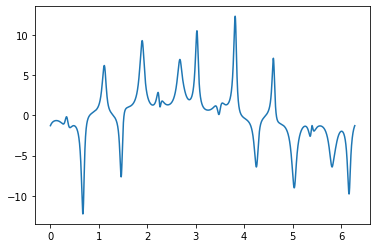

In [198]:
plt.plot([i for i in np.linspace(0, 2*3.1415926, num=3000)],[uy1(i) for i in np.linspace(0, 2*3.1415926, num=3000)] )

In [176]:
[i for i in np.linspace(0, 3, num=11)]

[0.0,
 0.3,
 0.6,
 0.8999999999999999,
 1.2,
 1.5,
 1.7999999999999998,
 2.1,
 2.4,
 2.6999999999999997,
 3.0]

In [179]:
[uy1(i) for i in np.linspace(0, 3, num=11)]

[-1.2368446852752082,
 -0.7967891061940006,
 -3.37325987437599,
 0.48283903393535116,
 1.0576690287309543,
 -1.650501432769964,
 3.327337697473837,
 1.3358068793341418,
 1.332492389349098,
 5.866363435072885,
 7.8279849735257585]

In [151]:
import scipy.integrate as integrate

In [167]:
integrate.quad(ux1, 0, 2*np.pi)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


(1.684763439868675e-14, 1.053844566743313e-07)

In [200]:
integrate.romberg(ux1, 0, 2*np.pi)

0.3317715257707842

In [201]:
integrate.romberg(uy1, 0, 2*np.pi)

-1.7609177642890007e-06